





































































































































































































































































































































































































































































































































































































































# Air Quality in India(2015-2020)

The dataset contains air quality data and AQI (Air Quality Index) at hourly and daily level of various stations across multiple cities in India.

Air Quality Index Categories
 
Good (0–50)           -  Minimal Impact
 
Satisfactory (51–100) - May cause minor breathing difficulties in sensitive people.
 
Moderately polluted (101–200) - May cause breathing difficulties in people with lung disease like asthma, and discomfort to people with heart disease, children and older adults.
 
Poor (201–300)        - May cause breathing difficulties in people on prolonged exposure, and discomfort to people with heart disease
 
Very Poor (301–400)   - May cause respiratory illness in people on prolonged exposure. Effect may be more pronounced in people with lung and heart diseases.
 
Severe (401-500)     - May cause respiratory issues in healthy people, and serious health issues in people with lung/heart disease. Difficulties may be experienced even during light physical activity.

In [1]:
#loading libraries
import pandas as pd
import numpy as np
import missingno as msno
# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
!pip install chart_studio
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')
#treating outliers
from scipy import stats
#preprocessing 
from sklearn.preprocessing import StandardScaler, LabelEncoder
from collections import Counter
# Classification (model bulding)
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier



In [2]:
#IMPORT DATASET
data = pd.read_csv("C:/Users/HP/Desktop/city_day.csv")

In [3]:
data

City        Date  PM2.5   PM10     NO    NO2    NOx    NH3  \
0          Ahmedabad  2015-01-01    NaN    NaN   0.92  18.22  17.15    NaN   
1          Ahmedabad  2015-01-02    NaN    NaN   0.97  15.69  16.46    NaN   
2          Ahmedabad  2015-01-03    NaN    NaN  17.40  19.30  29.70    NaN   
3          Ahmedabad  2015-01-04    NaN    NaN   1.70  18.48  17.97    NaN   
4          Ahmedabad  2015-01-05    NaN    NaN  22.10  21.42  37.76    NaN   
...              ...         ...    ...    ...    ...    ...    ...    ...   
29526  Visakhapatnam  2020-06-27  15.02  50.94   7.68  25.06  19.54  12.47   
29527  Visakhapatnam  2020-06-28  24.38  74.09   3.42  26.06  16.53  11.99   
29528  Visakhapatnam  2020-06-29  22.91  65.73   3.45  29.53  18.33  10.71   
29529  Visakhapatnam  2020-06-30  16.64  49.97   4.05  29.26  18.80  10.03   
29530  Visakhapatnam  2020-07-01  15.00  66.00   0.40  26.85  14.05   5.20   

          CO    SO2      O3  Benzene  Toluene  Xylene   AQI    AQI_Bucket  
0       0.92  27.64  133.36     0.00     0.02    0.00   NaN           NaN  
1       0.97  24.55   34.06     3.68     5.50    3.77   NaN           NaN  
2      17.40  29.07   30.70     6.80    16.40    2.25   NaN           NaN  
3       1.70  18.59   36.08     4.43    10.14    1.00   NaN           NaN  
4      22.10  39.33   39.31     7.01    18.89    2.78   NaN           NaN  
...      ...    ...     ...      ...      ...     ...   ...           ...  
29526   0.47   8.55   23.30     2.24    12.07    0.73  41.0          Good  
29527   0.52  12.72   30.14     0.74     2.21    0.38  70.0  Satisfactory  
29528   0.48   8.42   30.96     0.01     0.01    0.00  68.0  Satisfactory  
29529   0.52   9.84   28.30     0.00     0.00    0.00  54.0  Satisfactory  
29530   0.59   2.10   17.05      NaN      NaN     NaN  50.0          Good  

[29531 rows x 16 columns]

# EDA

Explore the data by finding info,correlation,value count and also the null values.

In [4]:
data.head()

City        Date  PM2.5  PM10     NO    NO2    NOx  NH3     CO    SO2  \
0  Ahmedabad  2015-01-01    NaN   NaN   0.92  18.22  17.15  NaN   0.92  27.64   
1  Ahmedabad  2015-01-02    NaN   NaN   0.97  15.69  16.46  NaN   0.97  24.55   
2  Ahmedabad  2015-01-03    NaN   NaN  17.40  19.30  29.70  NaN  17.40  29.07   
3  Ahmedabad  2015-01-04    NaN   NaN   1.70  18.48  17.97  NaN   1.70  18.59   
4  Ahmedabad  2015-01-05    NaN   NaN  22.10  21.42  37.76  NaN  22.10  39.33   

       O3  Benzene  Toluene  Xylene  AQI AQI_Bucket  
0  133.36     0.00     0.02    0.00  NaN        NaN  
1   34.06     3.68     5.50    3.77  NaN        NaN  
2   30.70     6.80    16.40    2.25  NaN        NaN  
3   36.08     4.43    10.14    1.00  NaN        NaN  
4   39.31     7.01    18.89    2.78  NaN        NaN

Converting dates to Pandas datetime format

In [5]:
data['Date'] = pd.to_datetime(data['Date'])
data.head()

City       Date  PM2.5  PM10     NO    NO2    NOx  NH3     CO    SO2  \
0  Ahmedabad 2015-01-01    NaN   NaN   0.92  18.22  17.15  NaN   0.92  27.64   
1  Ahmedabad 2015-01-02    NaN   NaN   0.97  15.69  16.46  NaN   0.97  24.55   
2  Ahmedabad 2015-01-03    NaN   NaN  17.40  19.30  29.70  NaN  17.40  29.07   
3  Ahmedabad 2015-01-04    NaN   NaN   1.70  18.48  17.97  NaN   1.70  18.59   
4  Ahmedabad 2015-01-05    NaN   NaN  22.10  21.42  37.76  NaN  22.10  39.33   

       O3  Benzene  Toluene  Xylene  AQI AQI_Bucket  
0  133.36     0.00     0.02    0.00  NaN        NaN  
1   34.06     3.68     5.50    3.77  NaN        NaN  
2   30.70     6.80    16.40    2.25  NaN        NaN  
3   36.08     4.43    10.14    1.00  NaN        NaN  
4   39.31     7.01    18.89    2.78  NaN        NaN

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   City        29531 non-null  object        
 1   Date        29531 non-null  datetime64[ns]
 2   PM2.5       24933 non-null  float64       
 3   PM10        18391 non-null  float64       
 4   NO          25949 non-null  float64       
 5   NO2         25946 non-null  float64       
 6   NOx         25346 non-null  float64       
 7   NH3         19203 non-null  float64       
 8   CO          27472 non-null  float64       
 9   SO2         25677 non-null  float64       
 10  O3          25509 non-null  float64       
 11  Benzene     23908 non-null  float64       
 12  Toluene     21490 non-null  float64       
 13  Xylene      11422 non-null  float64       
 14  AQI         24850 non-null  float64       
 15  AQI_Bucket  24850 non-null  object        
dtypes: datetime64[ns](1), 

In [7]:
data.shape

(29531, 16)

In [8]:
print("Total cities", len(data['City'].unique()))
data['City'].unique().tolist()

Total cities 26


['Ahmedabad',
 'Aizawl',
 'Amaravati',
 'Amritsar',
 'Bengaluru',
 'Bhopal',
 'Brajrajnagar',
 'Chandigarh',
 'Chennai',
 'Coimbatore',
 'Delhi',
 'Ernakulam',
 'Gurugram',
 'Guwahati',
 'Hyderabad',
 'Jaipur',
 'Jorapokhar',
 'Kochi',
 'Kolkata',
 'Lucknow',
 'Mumbai',
 'Patna',
 'Shillong',
 'Talcher',
 'Thiruvananthapuram',
 'Visakhapatnam']

In [9]:
data.corr()

PM2.5      PM10        NO       NO2       NOx       NH3        CO  \
PM2.5    1.000000  0.846498  0.433491  0.350709  0.436792  0.275086  0.089912   
PM10     0.846498  1.000000  0.502349  0.464380  0.527768  0.376816  0.112588   
NO       0.433491  0.502349  1.000000  0.478070  0.794890  0.185621  0.212607   
NO2      0.350709  0.464380  0.478070  1.000000  0.627627  0.234938  0.356521   
NOx      0.436792  0.527768  0.794890  0.627627  1.000000  0.166224  0.226992   
NH3      0.275086  0.376816  0.185621  0.234938  0.166224  1.000000  0.104891   
CO       0.089912  0.112588  0.212607  0.356521  0.226992  0.104891  1.000000   
SO2      0.132325  0.256974  0.170322  0.392233  0.238397 -0.038998  0.489697   
O3       0.161238  0.244919  0.014580  0.293349  0.093170  0.094972  0.041736   
Benzene  0.023911  0.022265  0.035771  0.025260  0.039121 -0.015650  0.061861   
Toluene  0.117080  0.169335  0.150857  0.273926  0.189386  0.013227  0.277904   
Xylene   0.114579  0.081700  0.094237  0.171701  0.087398 -0.019813  0.154889   
AQI      0.659181  0.803313  0.452191  0.537071  0.486450  0.252019  0.683346   

              SO2        O3   Benzene   Toluene    Xylene       AQI  
PM2.5    0.132325  0.161238  0.023911  0.117080  0.114579  0.659181  
PM10     0.256974  0.244919  0.022265  0.169335  0.081700  0.803313  
NO       0.170322  0.014580  0.035771  0.150857  0.094237  0.452191  
NO2      0.392233  0.293349  0.025260  0.273926  0.171701  0.537071  
NOx      0.238397  0.093170  0.039121  0.189386  0.087398  0.486450  
NH3     -0.038998  0.094972 -0.015650  0.013227 -0.019813  0.252019  
CO       0.489697  0.041736  0.061861  0.277904  0.154889  0.683346  
SO2      1.000000  0.162142  0.036110  0.296139  0.251195  0.490586  
O3       0.162142  1.000000  0.020255  0.130209  0.111410  0.198991  
Benzene  0.036110  0.020255  1.000000  0.739286  0.415427  0.044407  
Toluene  0.296139  0.130209  0.739286  1.000000  0.421432  0.279992  
Xylene   0.251195  0.111410  0.415427  0.421432  1.000000  0.165532  
AQI      0.490586  0.198991  0.044407  0.279992  0.165532  1.000000

In [10]:
data.describe()

PM2.5          PM10            NO           NO2           NOx  \
count  24933.000000  18391.000000  25949.000000  25946.000000  25346.000000   
mean      67.450578    118.127103     17.574730     28.560659     32.309123   
std       64.661449     90.605110     22.785846     24.474746     31.646011   
min        0.040000      0.010000      0.020000      0.010000      0.000000   
25%       28.820000     56.255000      5.630000     11.750000     12.820000   
50%       48.570000     95.680000      9.890000     21.690000     23.520000   
75%       80.590000    149.745000     19.950000     37.620000     40.127500   
max      949.990000   1000.000000    390.680000    362.210000    467.630000   

                NH3            CO           SO2            O3       Benzene  \
count  19203.000000  27472.000000  25677.000000  25509.000000  23908.000000   
mean      23.483476      2.248598     14.531977     34.491430      3.280840   
std       25.684275      6.962884     18.133775     21.694928     15.811136   
min        0.010000      0.000000      0.010000      0.010000      0.000000   
25%        8.580000      0.510000      5.670000     18.860000      0.120000   
50%       15.850000      0.890000      9.160000     30.840000      1.070000   
75%       30.020000      1.450000     15.220000     45.570000      3.080000   
max      352.890000    175.810000    193.860000    257.730000    455.030000   

            Toluene        Xylene           AQI  
count  21490.000000  11422.000000  24850.000000  
mean       8.700972      3.070128    166.463581  
std       19.969164      6.323247    140.696585  
min        0.000000      0.000000     13.000000  
25%        0.600000      0.140000     81.000000  
50%        2.970000      0.980000    118.000000  
75%        9.150000      3.350000    208.000000  
max      454.850000    170.370000   2049.000000

In [11]:
data.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

# DATA PREPROCESSING

# Missing value analysis and Treatment

<AxesSubplot:>

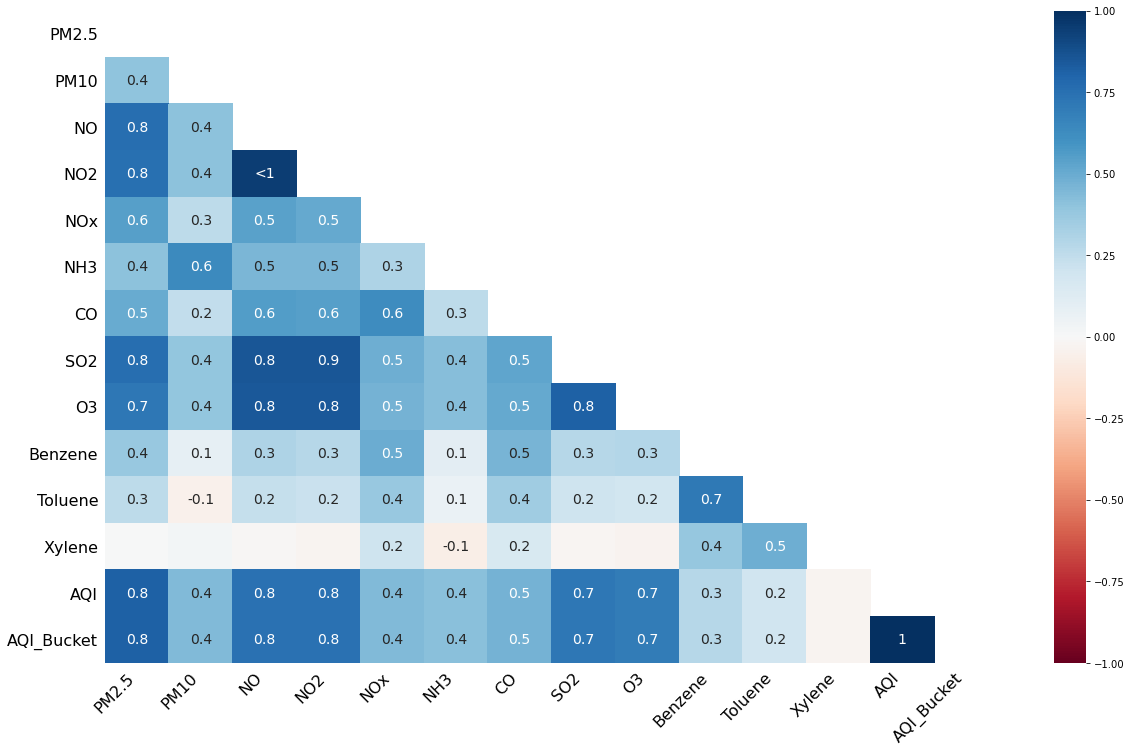

In [12]:
msno.heatmap(data)

In [13]:
df1 = data.copy()
df1['PM2.5']=df1['PM2.5'].fillna((df1['PM2.5'].median()))
df1['PM10']=df1['PM10'].fillna((df1['PM10'].median()))
df1['NO']=df1['NO'].fillna((df1['NO'].median()))
df1['NO2']=df1['NO2'].fillna((df1['NO2'].median()))
df1['NOx']=df1['NOx'].fillna((df1['NOx'].median()))
df1['NH3']=df1['NH3'].fillna((df1['NH3'].median()))
df1['CO']=df1['CO'].fillna((df1['CO'].median()))
df1['SO2']=df1['SO2'].fillna((df1['SO2'].median()))
df1['O3']=df1['O3'].fillna((df1['O3'].median()))
df1['Benzene']=df1['Benzene'].fillna((df1['Benzene'].median()))
df1['Toluene']=df1['Toluene'].fillna((df1['Toluene'].median()))
df1['Xylene']=df1['Xylene'].fillna((df1['Xylene'].median()))
df1['AQI']=df1['AQI'].fillna((df1['AQI'].median()))
df1['AQI_Bucket']=df1['AQI_Bucket'].fillna('Moderate')

In [14]:
df1.head()

City       Date  PM2.5   PM10     NO    NO2    NOx    NH3     CO  \
0  Ahmedabad 2015-01-01  48.57  95.68   0.92  18.22  17.15  15.85   0.92   
1  Ahmedabad 2015-01-02  48.57  95.68   0.97  15.69  16.46  15.85   0.97   
2  Ahmedabad 2015-01-03  48.57  95.68  17.40  19.30  29.70  15.85  17.40   
3  Ahmedabad 2015-01-04  48.57  95.68   1.70  18.48  17.97  15.85   1.70   
4  Ahmedabad 2015-01-05  48.57  95.68  22.10  21.42  37.76  15.85  22.10   

     SO2      O3  Benzene  Toluene  Xylene    AQI AQI_Bucket  
0  27.64  133.36     0.00     0.02    0.00  118.0   Moderate  
1  24.55   34.06     3.68     5.50    3.77  118.0   Moderate  
2  29.07   30.70     6.80    16.40    2.25  118.0   Moderate  
3  18.59   36.08     4.43    10.14    1.00  118.0   Moderate  
4  39.33   39.31     7.01    18.89    2.78  118.0   Moderate

# Boxplot (finding outliers)

<AxesSubplot:>

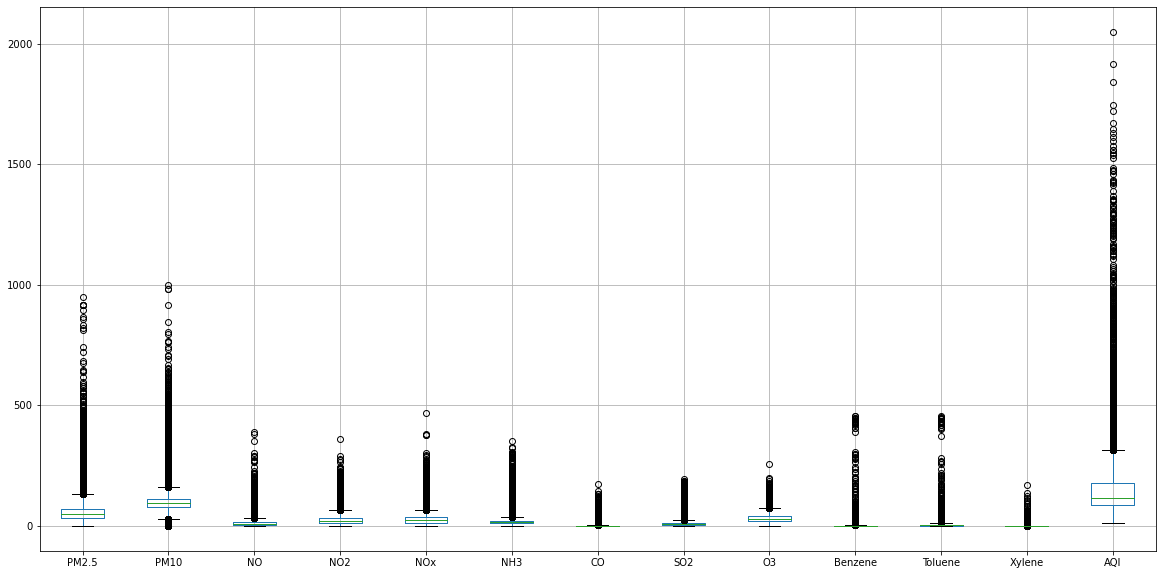

In [15]:
df1.boxplot(figsize=(20,10))

From the boxplot shown above we can clearly identify the attributes having large quantity of outliers. They are: ’PM2.5’, ‘PM10’, ‘N0’, ’NO2’,’NOx’, ‘NH3’, ‘CO’, ‘SO2’, ‘O3’, ‘Benzene’, ‘Toluene’, ‘Xylene’, and ‘AQI’. If we try to remove this outliers we may loss categories present in the attributes AQI_Bucket. So Outlier treatment is not possible in this case. 



# Pre corona[2016 to 2020]

Here I divide the data set into two part namely Vehicular Pollution content (PM2.5, PM10, NO2, NH3, CO,) and Industrial Pollution content (CO, SO2, O3, Benzene, Toluene, Xylene) and find how these contents correlated with AQI (air quality index)

In [16]:
%matplotlib inline

In [17]:
#pre corona
df = df1.copy()
df = df[df['Date']<=('01-01-2020')] 
df['Vehicular Pollution content'] = df['PM2.5']+df['PM10']+df['NO']+df['NO2']+df['NOx']+df['NH3']+df['CO']
df['Industrial Pollution content'] = df['SO2']+df['O3']+df['Benzene']+df['Toluene']+df['Xylene']
df = df.drop(['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3','Benzene','Toluene','Xylene'],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24908 entries, 0 to 29348
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   City                          24908 non-null  object        
 1   Date                          24908 non-null  datetime64[ns]
 2   AQI                           24908 non-null  float64       
 3   AQI_Bucket                    24908 non-null  object        
 4   Vehicular Pollution content   24908 non-null  float64       
 5   Industrial Pollution content  24908 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 1.3+ MB


# Visualization

In [18]:
def ploting(var):
    df[var].iplot(title=var,xTitle='Cities',
                  yTitle=var, linecolor='black', )
    plt.show()
ploting('Vehicular Pollution content')
ploting('Industrial Pollution content')

In [19]:
def max_bar_plot(var):
    x1 = df[['City',var]].groupby(["City"]).median().sort_values(by = var,
    ascending = True).tail(10).iplot(kind='bar', xTitle='Cities',yTitle=var, 
                                     linecolor='black', title='{2} {1} {0}'.format(")",var,' Most polluted cities('))

p1 = max_bar_plot('Industrial Pollution content')
p2 = max_bar_plot('Vehicular Pollution content')

In [20]:
def min_bar_plot(var):
    x1 = df[['City',var]].groupby(["City"]).mean().sort_values(by = var,
    ascending = True).head(10).iplot(kind='bar', yTitle='Cities',xTitle=var, linecolor='black',title='{2} {1} {0}'.format(")",var,' Minimum polluted cities('))
p1 = min_bar_plot('Industrial Pollution content')
p2 = min_bar_plot('Vehicular Pollution content')

In [21]:
def al(var):
    cities = [var]
    filtered_city_day = df1[df1['Date'] <= '2020-04-01']
    AQI = filtered_city_day[filtered_city_day.City.isin(cities)][['City','AQI_Bucket']]
    AQI[var] = AQI['AQI_Bucket']
    k = AQI[var].value_counts()
    m = pd.DataFrame((round((k/sum(k))*100)))
    return m
c11 = al('Ahmedabad')
c22 = al('Delhi')
c33 = al('Kolkata')
c44 = al('Mumbai')
c55 = al('Bengaluru')
df_row = pd.concat([c11,c22,c33,c44,c55],axis=1)
df_row.iplot(kind='bar', align='center',xTitle='Satisfaction level', yTitle='percentage of satisfaction' ,linecolor='black', title='Satisfaction level of people(Pre COVID19)')

# Post Corona [2020 >]


In [22]:
df = df1.copy()
df = df[df['Date'] > ('01-01-2020')] 
df['Vehicular Pollution content'] = df['PM2.5']+df['PM10']+df['NO']+df['NO2']+df['NOx']+df['NH3']+df['CO']
df['Industrial Pollution content'] = df['SO2']+df['O3']+df['Benzene']+df['Toluene']+df['Xylene']
df = df.drop(['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3','Benzene','Toluene','Xylene'],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4623 entries, 1827 to 29530
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   City                          4623 non-null   object        
 1   Date                          4623 non-null   datetime64[ns]
 2   AQI                           4623 non-null   float64       
 3   AQI_Bucket                    4623 non-null   object        
 4   Vehicular Pollution content   4623 non-null   float64       
 5   Industrial Pollution content  4623 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 252.8+ KB


In [23]:
def ploting(var):
    df[var].iplot(title=var,xTitle='Cities',yTitle=var, linecolor='black', )
    plt.show()
ploting('Vehicular Pollution content')
ploting('Industrial Pollution content')


In [24]:
def max_bar_plot(var):
    x1 = df[['City',var]].groupby(["City"]).median().sort_values(by = var,
    ascending = True).tail(10).iplot(kind='bar', xTitle='Cities',yTitle=var, 
                                     linecolor='black', title='{2} {1} {0}'.format(")",var,' Most polluted cities('))

p1 = max_bar_plot('Industrial Pollution content')
p2 = max_bar_plot('Vehicular Pollution content')

In [25]:
def min_bar_plot(var):
    x1 = df[['City',var]].groupby(["City"]).mean().sort_values(by = var,
    ascending = True).head(10).iplot(kind='bar', yTitle='Cities',xTitle=var, linecolor='black',title='{2} {1} {0}'.format(")",var,' Minimum polluted cities('))
p1 = min_bar_plot('Industrial Pollution content')
p2 = min_bar_plot('Vehicular Pollution content')

In [26]:
def al(var):
    cities = [var]
    filtered_city_day = df1[df1['Date'] > '2020-04-01']
    AQI = filtered_city_day[filtered_city_day.City.isin(cities)][['City','AQI_Bucket']]
    AQI[var] = AQI['AQI_Bucket']
    k = AQI[var].value_counts()
    m = pd.DataFrame((round((k/sum(k))*100)))
    return m
c11 = al('Ahmedabad')
c22 = al('Delhi')
c33 = al('Kolkata')
c44 = al('Mumbai')
c55 = al('Bengaluru')
df_row = pd.concat([c11,c22,c33,c44,c55],axis=1)
df_row.iplot(kind='bar', align='center',xTitle='Satisfaction level', yTitle='percentage of satisfaction' ,linecolor='black', title='Satisfaction level of people(Post COVID19)')

#  DATA PREPROCESSING

In [27]:
categorical_attributes = list(df1.select_dtypes(include=['object']).columns)
print("categorical_attributes",categorical_attributes)
le=LabelEncoder()
df1['City']=le.fit_transform(df1['City'].astype(str))
df1['AQI_Bucket']=le.fit_transform(df1['AQI_Bucket'].astype(str))
df1.info()

categorical_attributes ['City', 'AQI_Bucket']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   City        29531 non-null  int32         
 1   Date        29531 non-null  datetime64[ns]
 2   PM2.5       29531 non-null  float64       
 3   PM10        29531 non-null  float64       
 4   NO          29531 non-null  float64       
 5   NO2         29531 non-null  float64       
 6   NOx         29531 non-null  float64       
 7   NH3         29531 non-null  float64       
 8   CO          29531 non-null  float64       
 9   SO2         29531 non-null  float64       
 10  O3          29531 non-null  float64       
 11  Benzene     29531 non-null  float64       
 12  Toluene     29531 non-null  float64       
 13  Xylene      29531 non-null  float64       
 14  AQI         29531 non-null  float64       
 15  AQI_Bucket  29531 non-nu

In [28]:
cor = df1.corr()
cor.style.background_gradient(cmap='coolwarm')

# DATA VISUALIZATION

Text(0.5, 1.0, 'Heatmap')

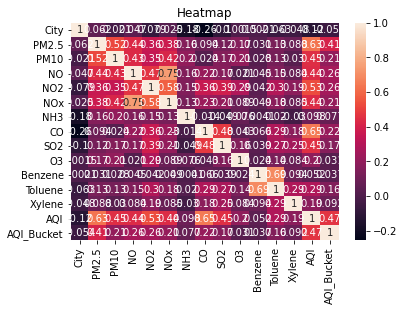

In [29]:
sns.heatmap(df1.corr(),annot=True)
plt.title('Heatmap')

Heatmap represent the correlation between  different attributes .From the map we can identify the irrelevent attributes in the dataset.But here all the attributes are relevent.

Text(0.5, 1.0, 'Countplot')

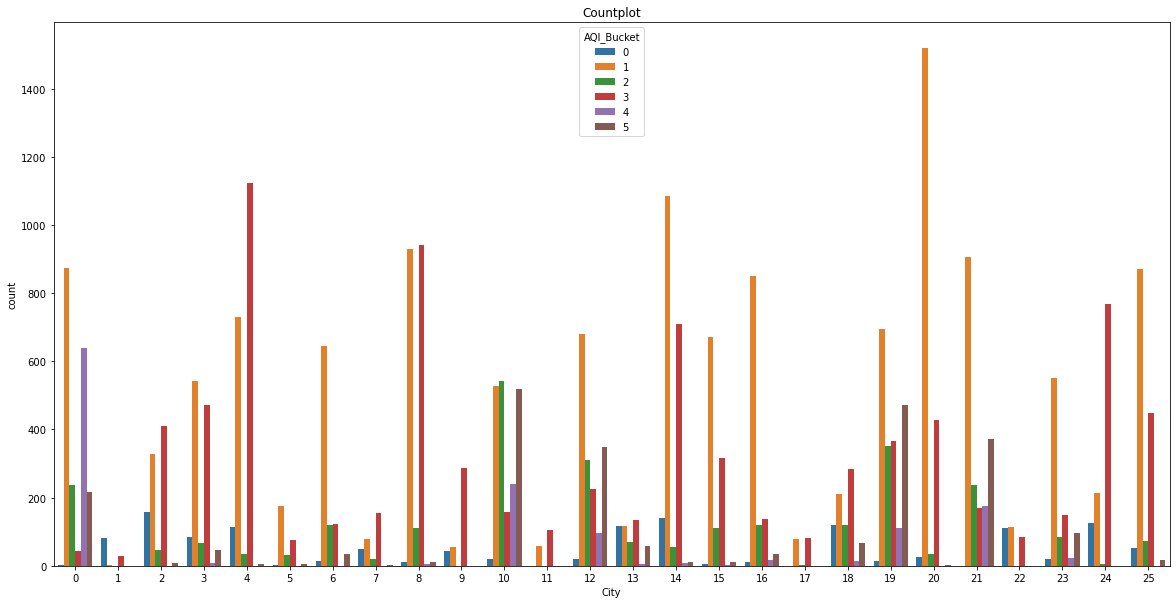

In [30]:
plt.figure(figsize=(20,10))
sns.countplot(x='City', data=df1,hue='AQI_Bucket')
plt.title('Countplot')

 This represent the countplot of the attribute ‘City’ from the dataset.The attribute ‘City’ represents the major cities in India. The AQI categories ‘Good’, ‘Satisfactory’, ‘Moderately   polluted’, ‘Poor’, ‘Very Poor’, and ‘Severe’ for various cities are shown in this graph. From this graph we can find the  air quality of each city.

In [ ]:
sns.pairplot(data=df1,hue="AQI_Bucket")

Error in callback <function flush_figures at 0x0000018D51E3E280> (for post_execute):


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\HP\anaconda\lib\site-packages\IPython\core\events.py", line 89, in trigger
    func(*args, **kwargs)
  File "C:\Users\HP\anaconda\lib\site-packages\ipykernel\pylab\backend_inline.py", line 121, in flush_figures
    return show(True)
  File "C:\Users\HP\anaconda\lib\site-packages\ipykernel\pylab\backend_inline.py", line 41, in show
    display(
  File "C:\Users\HP\anaconda\lib\site-packages\IPython\core\display.py", line 313, in display
    format_dict, md_dict = format(obj, include=include, exclude=exclude)
  File "C:\Users\HP\anaconda\lib\site-packages\IPython\core\formatters.py", line 180, in format
    data = formatter(obj)
  File "<decorator-gen-2>", line 2, in __call__
  File "C:\Users\HP\anaconda\lib\site-packages\IPython\core\formatters.py", line 224, in catch_format_error
    r = method(self, *args, **kwargs)
  File "C:\Users\HP\anaconda\lib\site-packages\IPython\core\formatters.py", line 341, in __call__
    return printer(ob

The pairplot depicts the pairwise relationship in a dataset.  

# Splitting Data

In [32]:
y = df1["AQI_Bucket"]
x = df1[['City', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [33]:
x

City  PM2.5   PM10     NO    NO2    NOx    NH3     CO    SO2      O3  \
0         0  48.57  95.68   0.92  18.22  17.15  15.85   0.92  27.64  133.36   
1         0  48.57  95.68   0.97  15.69  16.46  15.85   0.97  24.55   34.06   
2         0  48.57  95.68  17.40  19.30  29.70  15.85  17.40  29.07   30.70   
3         0  48.57  95.68   1.70  18.48  17.97  15.85   1.70  18.59   36.08   
4         0  48.57  95.68  22.10  21.42  37.76  15.85  22.10  39.33   39.31   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...     ...   
29526    25  15.02  50.94   7.68  25.06  19.54  12.47   0.47   8.55   23.30   
29527    25  24.38  74.09   3.42  26.06  16.53  11.99   0.52  12.72   30.14   
29528    25  22.91  65.73   3.45  29.53  18.33  10.71   0.48   8.42   30.96   
29529    25  16.64  49.97   4.05  29.26  18.80  10.03   0.52   9.84   28.30   
29530    25  15.00  66.00   0.40  26.85  14.05   5.20   0.59   2.10   17.05   

       Benzene  Toluene  Xylene    AQI  
0         0.00     0.02    0.00  118.0  
1         3.68     5.50    3.77  118.0  
2         6.80    16.40    2.25  118.0  
3         4.43    10.14    1.00  118.0  
4         7.01    18.89    2.78  118.0  
...        ...      ...     ...    ...  
29526     2.24    12.07    0.73   41.0  
29527     0.74     2.21    0.38   70.0  
29528     0.01     0.01    0.00   68.0  
29529     0.00     0.00    0.00   54.0  
29530     1.07     2.97    0.98   50.0  

[29531 rows x 14 columns]

In [34]:
y

0        1
1        1
2        1
3        1
4        1
        ..
29526    0
29527    3
29528    3
29529    3
29530    0
Name: AQI_Bucket, Length: 29531, dtype: int32

In [35]:
print('Classes and number of values in trainset', Counter(y_train))

Classes and number of values in trainset Counter({1: 9393, 3: 5799, 2: 1940, 5: 1634, 4: 957, 0: 948})


Data Imbalance:

Here we observe that target label is not splitted eqaully. This will cause data imbalance problem. In order to overcome this problem we use the technique called SMOTE(Synthetic Minority Oversampling Technique). This approach solve this problem by oversample the examples in the minority class.

In [36]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
x_train,y_train = oversample.fit_resample(x_train,y_train)
print('Classes and number of values in trainset after SMOTE:',Counter(y_train))

Classes and number of values in trainset after SMOTE: Counter({1: 9393, 5: 9393, 3: 9393, 0: 9393, 2: 9393, 4: 9393})


In [37]:
df1

City       Date  PM2.5   PM10     NO    NO2    NOx    NH3     CO  \
0         0 2015-01-01  48.57  95.68   0.92  18.22  17.15  15.85   0.92   
1         0 2015-01-02  48.57  95.68   0.97  15.69  16.46  15.85   0.97   
2         0 2015-01-03  48.57  95.68  17.40  19.30  29.70  15.85  17.40   
3         0 2015-01-04  48.57  95.68   1.70  18.48  17.97  15.85   1.70   
4         0 2015-01-05  48.57  95.68  22.10  21.42  37.76  15.85  22.10   
...     ...        ...    ...    ...    ...    ...    ...    ...    ...   
29526    25 2020-06-27  15.02  50.94   7.68  25.06  19.54  12.47   0.47   
29527    25 2020-06-28  24.38  74.09   3.42  26.06  16.53  11.99   0.52   
29528    25 2020-06-29  22.91  65.73   3.45  29.53  18.33  10.71   0.48   
29529    25 2020-06-30  16.64  49.97   4.05  29.26  18.80  10.03   0.52   
29530    25 2020-07-01  15.00  66.00   0.40  26.85  14.05   5.20   0.59   

         SO2      O3  Benzene  Toluene  Xylene    AQI  AQI_Bucket  
0      27.64  133.36     0.00     0.02    0.00  118.0           1  
1      24.55   34.06     3.68     5.50    3.77  118.0           1  
2      29.07   30.70     6.80    16.40    2.25  118.0           1  
3      18.59   36.08     4.43    10.14    1.00  118.0           1  
4      39.33   39.31     7.01    18.89    2.78  118.0           1  
...      ...     ...      ...      ...     ...    ...         ...  
29526   8.55   23.30     2.24    12.07    0.73   41.0           0  
29527  12.72   30.14     0.74     2.21    0.38   70.0           3  
29528   8.42   30.96     0.01     0.01    0.00   68.0           3  
29529   9.84   28.30     0.00     0.00    0.00   54.0           3  
29530   2.10   17.05     1.07     2.97    0.98   50.0           0  

[29531 rows x 16 columns]

# Classification (MODEL BUILDING)

# KNN

In [38]:
from sklearn.neighbors import KNeighborsClassifier
model_knn=KNeighborsClassifier()
model_knn.fit(x_train,y_train)

KNeighborsClassifier()

In [39]:
pred_knn=model_knn.predict(x_test)
pred_knn

array([5, 1, 1, ..., 3, 1, 2])

In [40]:
acc_knn=accuracy_score(y_test,pred_knn)*100
acc_knn

93.97291196388262

[Text(0, 0.5, 'False'), Text(0, 1.5, 'True')]

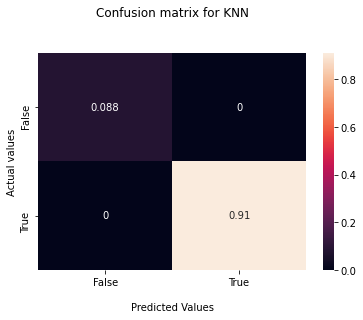

In [41]:
con_mat=confusion_matrix(y_test,pred_knn,labels=[0,1])
ax=sns.heatmap(con_mat/np.sum(con_mat),annot=True)
ax.set_title('Confusion matrix for KNN\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual values')

ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

In [42]:
print(classification_report(y_test,pred_knn))

              precision    recall  f1-score   support

           0       0.81      0.96      0.88       393
           1       0.98      0.94      0.96      4117
           2       0.88      0.95      0.91       841
           3       0.93      0.93      0.93      2425
           4       0.93      0.95      0.94       381
           5       0.92      0.92      0.92       703

    accuracy                           0.94      8860
   macro avg       0.91      0.94      0.92      8860
weighted avg       0.94      0.94      0.94      8860



Conclusion:
Vehicular pollution contents are more related to air quality index.
Delhi is the most polluted city in terms of vehicular pollution contents.
Ahmadabad is the most polluted city in terms of industrial pollution content.
After COVID19 pandemic there is gradual dicrease in vehicular pollution contents, industrial pollution content.
Among  the algorithms we proposed, KNN is the best algorithm with accuracy 93.7%